# IMPORTATIONS 

In [1]:
# Import libraries :

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
)
import matplotlib.pyplot as plt
import warnings

In [2]:
# Import dataset :

dataset = pd.read_csv("ITA_OSHA_Combined.csv", low_memory=False)
dataset.head()

,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,...,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason,source,delete
0,4,"McKamish, Inc.","McKamish, Inc.",NaN,50 55th Street,Pittsburgh,PA,15201.0,238220,"Heating, ventilation and air-conditioning (HVA...",...,0,0,41920,1.0,3,2016,8/1/2017 6:12:00,NaN,ITA Data CY 2016.csv,NaN
1,5,"The Talaria Company, LLC",The Hinckley Company,NaN,40 Industrial Way,Trenton,ME,4605.0,336612,Pleasure boats manufacturing,...,0,0,41922,1.0,3,2016,8/1/2017 6:23:00,NaN,ITA Data CY 2016.csv,NaN
2,6,Williamsburg Manufacturing,Williamsburg Manufacturing,NaN,408 Maplewood Ave,Williamsburg,IA,52361.0,336370,Motor vehicle metal parts stamping,...,0,0,41923,1.0,3,2016,8/1/2017 6:27:00,NaN,ITA Data CY 2016.csv,NaN
3,7,"The Talaria Company, LLC","Morris Yachts, LLC",NaN,27 Ramp Road,Trenton,ME,4605.0,336612,Pleasure boats manufacturing,...,0,0,41925,1.0,2,2016,8/1/2017 6:36:00,Hit wrong hyperlink,ITA Data CY 2016.csv,NaN
4,8,"The Talaria Company, LLC","Hunt Yachts, LLC",NaN,1909 Alden Landing,Portsmouth,RI,2871.0,336612,Pleasure boats manufacturing,...,0,0,41926,1.0,2,2016,8/1/2017 6:35:00,NaN,ITA Data CY 2016.csv,NaN


In [3]:
# Filter the dataset 
# We will only use the informations of the year 2020 :

dataset_2020 = dataset[dataset['year_filing_for'].isin([2020])]
dataset_2020.head()



,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,...,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason,source,delete
794987,1090429,"CCL Tube (Wilkes-Barre), Inc.",CCL Tube,NaN,1 Lasley Avenue,Wilkes Barre,PA,18706.0,561910,Labeling services,...,0,0,93030,1.0,2,2020,1/1/2021 13:57:57,NaN,ITA Data CY 2020.csv,NaN
794988,1090430,"Del-Co Water Company, Inc.",All Locations,310749383.0,6658 Olentangy River Rd,Delaware,OH,43015.0,221310,Water treatment and distribution,...,0,0,85507,1.0,2,2020,1/1/2021 14:35:40,NaN,ITA Data CY 2020.csv,NaN
794989,1090431,DURATECH INDUSTRIES INTERNATIONAL INC,DURATECH INDUSTRIES INTERNATIONAL INC,450283636.0,3780 HIGHWAY 281 SE,JAMESTOWN,ND,584019421.0,333111,Bale throwers manufacturing,...,0,0,649852,1.0,2,2020,1/1/2021 16:04:06,NaN,ITA Data CY 2020.csv,NaN
794990,1090432,Fred Wahl Marine Construction,Fred Wahl Marine Construction,931029886.0,135 Shipyard Way,Reedsport,OR,97467.0,336611,Naval ship building,...,0,0,541133,1.0,2,2020,1/1/2021 17:11:02,NaN,ITA Data CY 2020.csv,NaN
794991,1090433,"J.R. Johnson, LLC","J.R. Johnson, LLC",931153731.0,9425 N. Burrage Ave,Portland,OR,97217.0,236116,"Construction management, multifamily building",...,0,0,407708,1.0,2,2020,1/1/2021 17:11:19,NaN,ITA Data CY 2020.csv,NaN


# STATISTICS 

In [4]:
# Basic stats

print("Number of rows : {}".format(dataset_2020.shape[0]))
print()

print("Number of columns : {}".format(dataset_2020.shape[1]))
print()

print("Display of dataset: ")
display(dataset_2020.head())
print()

print("Basics statistics: ")
data_desc = dataset_2020.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*dataset_2020.isnull().sum()/dataset.shape[0])

Number of rows : 293391

Number of columns : 33

Display of dataset: 


,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,...,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason,source,delete
794987,1090429,"CCL Tube (Wilkes-Barre), Inc.",CCL Tube,NaN,1 Lasley Avenue,Wilkes Barre,PA,18706.0,561910,Labeling services,...,0,0,93030,1.0,2,2020,1/1/2021 13:57:57,NaN,ITA Data CY 2020.csv,NaN
794988,1090430,"Del-Co Water Company, Inc.",All Locations,310749383.0,6658 Olentangy River Rd,Delaware,OH,43015.0,221310,Water treatment and distribution,...,0,0,85507,1.0,2,2020,1/1/2021 14:35:40,NaN,ITA Data CY 2020.csv,NaN
794989,1090431,DURATECH INDUSTRIES INTERNATIONAL INC,DURATECH INDUSTRIES INTERNATIONAL INC,450283636.0,3780 HIGHWAY 281 SE,JAMESTOWN,ND,584019421.0,333111,Bale throwers manufacturing,...,0,0,649852,1.0,2,2020,1/1/2021 16:04:06,NaN,ITA Data CY 2020.csv,NaN
794990,1090432,Fred Wahl Marine Construction,Fred Wahl Marine Construction,931029886.0,135 Shipyard Way,Reedsport,OR,97467.0,336611,Naval ship building,...,0,0,541133,1.0,2,2020,1/1/2021 17:11:02,NaN,ITA Data CY 2020.csv,NaN
794991,1090433,"J.R. Johnson, LLC","J.R. Johnson, LLC",931153731.0,9425 N. Burrage Ave,Portland,OR,97217.0,236116,"Construction management, multifamily building",...,0,0,407708,1.0,2,2020,1/1/2021 17:11:19,NaN,ITA Data CY 2020.csv,NaN



Basics statistics: 


,id,company_name,establishment_name,ein,street_address,city,state,zip_code,naics_code,industry_description,...,total_hearing_loss,total_other_illnesses,establishment_id,establishment_type,size,year_filing_for,created_timestamp,change_reason,source,delete
count,2.933910e+05,264357,293386,2.614900e+05,293389,293389,293391,2.933910e+05,293391.000000,273314,...,293391.000000,293391.000000,293391.000000,291512,293391.000000,293391.0,293391,16710,293391,0.0
unique,NaN,94335,278199,NaN,270987,27510,74,NaN,NaN,13975,...,NaN,NaN,NaN,3,NaN,NaN,218732,3246,1,NaN
top,NaN,USPS,Main Office,NaN,VIRTUAL,Houston,CA,NaN,NaN,Mail and Parcel Delivery,...,NaN,NaN,NaN,1.0,NaN,NaN,2/2/2021 22:35:39,0,ITA Data CY 2020.csv,NaN
freq,NaN,7644,177,NaN,1783,2169,32020,NaN,NaN,7644,...,NaN,NaN,NaN,277772,NaN,NaN,31,9138,293391,NaN
mean,1.237531e+06,NaN,NaN,4.899436e+08,NaN,NaN,NaN,1.571896e+07,459619.258382,NaN,...,0.026460,0.429795,461717.495298,NaN,1.937561,2020.0,NaN,NaN,NaN,NaN
std,8.509156e+04,NaN,NaN,2.527222e+08,NaN,NaN,NaN,1.034832e+08,160142.747597,NaN,...,0.490899,5.507237,219909.359407,NaN,0.526846,0.0,NaN,NaN,NaN,NaN
min,1.090429e+06,NaN,NaN,4.533000e+03,NaN,NaN,NaN,0.000000e+00,111100.000000,NaN,...,0.000000,0.000000,41924.000000,NaN,1.000000,2020.0,NaN,NaN,NaN,NaN
25%,1.163784e+06,NaN,NaN,2.748292e+08,NaN,NaN,NaN,2.946100e+04,332722.000000,NaN,...,0.000000,0.000000,279845.500000,NaN,2.000000,2020.0,NaN,NaN,NaN,NaN
50%,1.237655e+06,NaN,NaN,4.537712e+08,NaN,NaN,NaN,5.032300e+04,445110.000000,NaN,...,0.000000,0.000000,494951.000000,NaN,2.000000,2020.0,NaN,NaN,NaN,NaN
75%,1.311120e+06,NaN,NaN,7.105620e+08,NaN,NaN,NaN,7.872400e+04,561320.000000,NaN,...,0.000000,0.000000,668177.500000,NaN,2.000000,2020.0,NaN,NaN,NaN,NaN



Percentage of missing values: 


id                               0.000000
company_name                     1.775602
establishment_name               0.000306
ein                              1.950936
street_address                   0.000122
city                             0.000122
state                            0.000000
zip_code                         0.000000
naics_code                       0.000000
industry_description             1.227828
annual_average_employees         0.000000
total_hours_worked               0.000000
no_injuries_illnesses            0.000000
total_deaths                     0.000000
total_dafw_cases                 0.000000
total_djtr_cases                 0.000000
total_other_cases                0.000000
total_dafw_days                  0.000000
total_djtr_days                  0.000000
total_injuries                   0.000000
total_poisonings                 0.000000
total_respiratory_conditions     0.000000
total_skin_disorders             0.000000
total_hearing_loss               0

# DATA CLEANING 

### Choose the columns to keep 

In [5]:
# Filter dataset by keeping the columns needed only :

cols_to_keep = ['establishment_name', 'city','state', 'industry_description', 'naics_code', 'annual_average_employees', 'establishment_type', 'year_filing_for','created_timestamp','total_hours_worked', 'total_deaths','total_dafw_cases','total_djtr_cases','total_other_cases', 'total_injuries']
dataset_2020=dataset_2020[cols_to_keep]
dataset_2020.head()

,establishment_name,city,state,industry_description,naics_code,annual_average_employees,establishment_type,year_filing_for,created_timestamp,total_hours_worked,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_injuries
794987,CCL Tube,Wilkes Barre,PA,Labeling services,561910,185,1.0,2020,1/1/2021 13:57:57,386835.0,0,0,2,2,4
794988,All Locations,Delaware,OH,Water treatment and distribution,221310,104,1.0,2020,1/1/2021 14:35:40,216320.0,0,2,0,0,2
794989,DURATECH INDUSTRIES INTERNATIONAL INC,JAMESTOWN,ND,Bale throwers manufacturing,333111,87,1.0,2020,1/1/2021 16:04:06,206200.0,0,1,1,3,5
794990,Fred Wahl Marine Construction,Reedsport,OR,Naval ship building,336611,109,1.0,2020,1/1/2021 17:11:02,215620.0,0,6,4,5,15
794991,"J.R. Johnson, LLC",Portland,OR,"Construction management, multifamily building",236116,142,1.0,2020,1/1/2021 17:11:19,268700.0,0,4,2,9,15


In [6]:
dataset_2020.shape

(293391, 15)

### Identify and clean missing values 

In [7]:
# Identifying the missing values : 

print("Percentage of missing values: ")
display(100*dataset_2020.isnull().sum()/dataset_2020.shape[0])

Percentage of missing values: 


establishment_name          0.001704
city                        0.000682
state                       0.000000
industry_description        6.843087
naics_code                  0.000000
annual_average_employees    0.000000
establishment_type          0.640442
year_filing_for             0.000000
created_timestamp           0.000000
total_hours_worked          0.000000
total_deaths                0.000000
total_dafw_cases            0.000000
total_djtr_cases            0.000000
total_other_cases           0.000000
total_injuries              0.000000
dtype: float64

In [8]:
dataset_2020.reset_index(drop=True, inplace=True)

In [9]:
# Deleting the missing values in the whole dataset :

dataset_2020 = dataset_2020.dropna()

In [10]:
dataset_2020.shape

(271626, 15)

# EDA

### Exploring the column created_timestamp

This column contains the date and time the reporting was done, normally the year after the accident

In [11]:
# Converting the column into datetime type :

dataset_2020['created_timestamp']=pd.to_datetime(dataset_2020['created_timestamp'])

### Exploring the establishment type column 

In [12]:
dataset_2020['establishment_type'].dtype

dtype('O')

This column should contain numbers 1, 2 or 3

In [13]:
# Converting the column into numeric type :

dataset_2020['establishment_type'] = pd.to_numeric(dataset_2020['establishment_type'], errors='coerce')
dataset_2020['establishment_type'].dtype

dtype('float64')

In [14]:
# Verifying the unique values of our column :

print(dataset_2020['establishment_type'].unique())

[1. 3. 2.]


### Exploring the establishment_name column 

In [15]:
dataset_2020['establishment_name'].dtype

dtype('O')

In [16]:
# Calculating unique values :

print("Number of unique establishments :", dataset_2020['establishment_name'].nunique())

Number of unique establishments : 257404


In [17]:
# Calculating duplicates :

print("Number of duplicates of establishment name :", dataset_2020[dataset_2020.duplicated(['establishment_name'], keep=False)]['establishment_name'].nunique())

print('Number of duplicate values and their count :', dataset_2020['establishment_name'].value_counts()[dataset_2020['establishment_name'].value_counts() > 1])

Number of duplicates of establishment name : 6748
Number of duplicate values and their count : establishment_name
Main Office         176
Corporate           110
Corporate Office    108
Headquarters         82
Construction         76
                   ... 
69930018-000012       2
Store 0622            2
Store 1206            2
Parkdale              2
69930018-000013       2
Name: count, Length: 6748, dtype: int64


In [18]:
# Deleting duplicates with the same establishment name, the same state, the same establishment type and the same created timestamp :

dataset_2020 = dataset_2020.drop_duplicates(subset=["establishment_name", "state", "establishment_type", 'created_timestamp'])

In [19]:
# Grouping the rows where the establishment name, state, city and establishment time are the same :
dataset_2020 = dataset_2020.groupby(
    ['establishment_name', 'city', 'state', 'establishment_type'],
    as_index=False
).agg({
    'created_timestamp':'first',
    'naics_code':'first',
    'industry_description':'first',
    'annual_average_employees': 'sum',
    'total_hours_worked': 'sum',
    'total_deaths': 'sum',
    'total_dafw_cases': 'sum',
    'total_djtr_cases': 'sum',
    'total_other_cases': 'sum',
    'total_injuries': 'sum'
})

# Afficher le dataframe regroupé
display(dataset_2020)

,establishment_name,city,state,establishment_type,created_timestamp,naics_code,industry_description,annual_average_employees,total_hours_worked,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_injuries
0,\t CA001PHM,City of Industry,CA,1.0,2021-03-09 02:08:34,713950,Bowling alleys,67,19131.0,0,0,0,0,0
1,\t CA002MVM,Moreno Valley,CA,1.0,2021-03-09 02:14:31,713950,Bowling centers,39,14611.0,0,0,0,0,0
2,\t CA031TMP,Temecula,CA,1.0,2021-03-09 06:12:32,713950,Bowling centers,56,19647.0,0,0,0,2,2
3,\t CO013SWP,Littleton,CO,1.0,2021-03-09 06:12:31,713950,Bowling centers,34,18180.0,0,0,0,1,1
4,\t KS042TES,Wichita,KS,1.0,2021-03-09 05:47:34,713950,Bowling centers,48,297335.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267638,witman ranch inc,escondido,CA,1.0,2021-01-28 16:18:07,115115,Agriculture production or harvesting crews,45,82652.0,0,3,0,0,3
267639,woodcrest rehabilitation,flushing,NY,1.0,2021-02-12 16:26:13,623110,Skilled nursing facilities,266,281254.0,0,42,0,0,2
267640,wrights health care,seminole,FL,1.0,2021-02-01 18:33:28,623110,Nursing homes,62,94648.0,0,16,0,0,0
267641,yard,Fort Worth,TX,1.0,2021-02-25 15:27:37,238320,Painting and wallpapering,20,38766.0,0,0,0,0,0


In [20]:
# Recalculating duplicates :

print("Number of duplicates of establishment name :", dataset_2020[dataset_2020.duplicated(['establishment_name'], keep=False)]['establishment_name'].nunique())

print('Number of duplicates values and their count :', dataset_2020['establishment_name'].value_counts()[dataset_2020['establishment_name'].value_counts() > 1])

Number of duplicates of establishment name : 5384
Number of duplicates values and their count : establishment_name
Main Office         163
Corporate           101
Corporate Office     99
Headquarters         79
Construction         76
                   ... 
Store 1247            2
5700                  2
Store 0480            2
Providence            2
Store 1233            2
Name: count, Length: 5384, dtype: int64


In [21]:
# Showing the top 10 duplicates :
 
duplicates= dataset_2020['establishment_name'].value_counts()[dataset_2020['establishment_name'].value_counts() > 22]
print('Number of duplicate values and their count :', duplicates)

Number of duplicate values and their count : establishment_name
Main Office               163
Corporate                 101
Corporate Office           99
Headquarters               79
Construction               76
Fire Department            56
Public Works               53
Police Department          53
Main                       47
Office                     45
City Hall                  41
48forty Solutions          37
Transportation             37
Administration             36
Home Office                34
Manufacturing              28
Corporate Headquarters     28
Town Hall                  27
Main Office - 01           25
Warehouse                  24
Name: count, dtype: int64


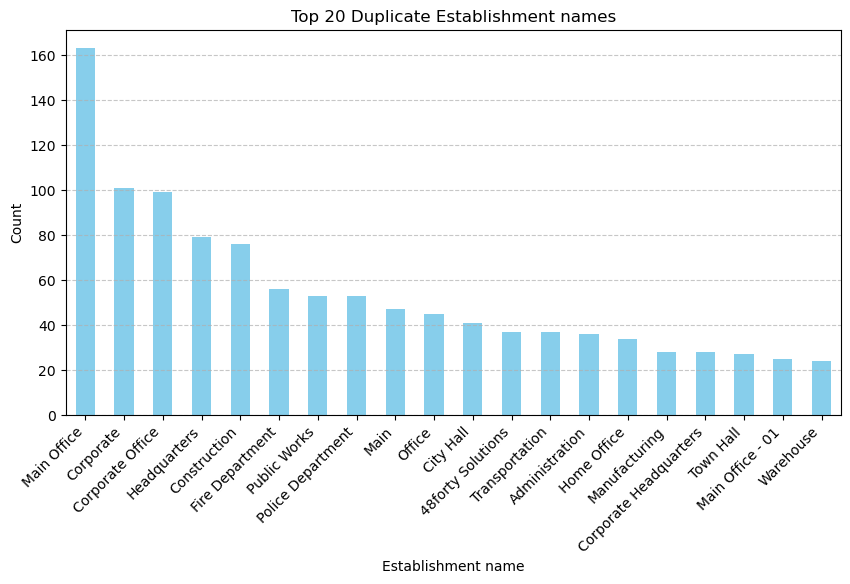

In [22]:
# Plot in a bar graph :

plt.figure(figsize=(10, 5))
duplicates.plot(kind='bar', color='skyblue')
plt.title('Top 20 Duplicate Establishment names')
plt.xlabel('Establishment name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Exploring the column state

In [23]:
# Calculating unique values :

print("Number of unique states :", dataset_2020['state'].nunique())

Number of unique states : 73


The US has only 50 states so there must be an error.

In [24]:
# Tranforming the whole column state into capital letters and recalculating the unique values :

dataset_2020['state']=dataset_2020['state'].str.upper()
print("Number of unique states :", dataset_2020['state'].nunique())

Number of unique states : 60


We have less states than before but it is still more than 50, so let's have a look what are those values to identify those who doesn't represent a state.

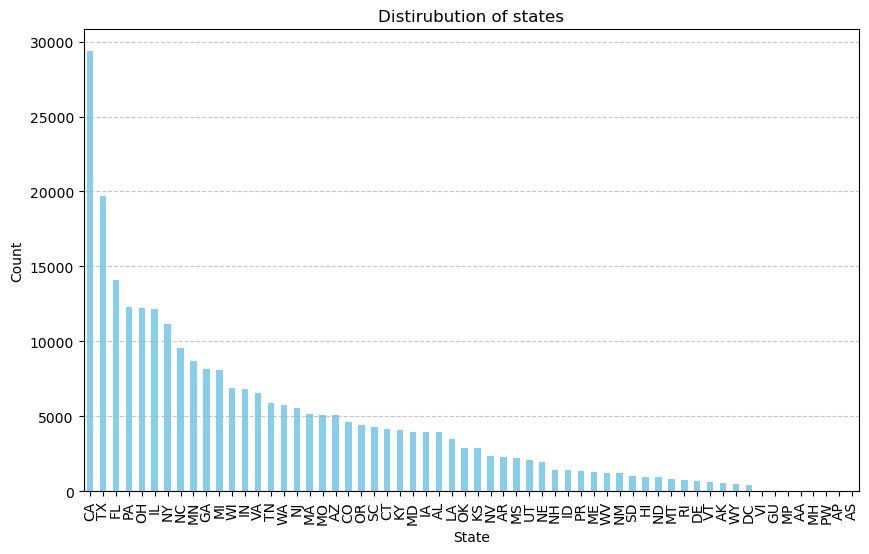

In [25]:
# Showing the 60 values in a histogram :

plt.figure(figsize=(10, 6))
dataset_2020['state'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distirubution of states')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The last 10 values are not states and don't represent much in ou dataset, so let's remove them.

In [26]:
# Creating a list with the 50 real US States :
us_states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# Cleaning the dataset by deleting the rows that don't have one of the values in the list :

dataset_2020 = dataset_2020[dataset_2020['state'].isin(us_states)]

In [27]:
# Recalculating unique values :

print("Number of unique states :", dataset_2020['state'].nunique())

Number of unique states : 50


### Exploring the columns total_injuries, total_deaths, total_dafw_cases, total_djtr_cases and total_other_cases

In [29]:
# Verifying the columns type :

columns = ['total_injuries','total_deaths','total_dafw_cases','total_djtr_cases','total_other_cases']
dataset_2020[columns].dtypes

total_injuries       int64
total_deaths         int64
total_dafw_cases     int64
total_djtr_cases     int64
total_other_cases    int64
dtype: object

In [30]:
# Verifying if the column total_injuries is the sum of total_deaths, total_dafw_cases, total_djtr_cases and total_other_cases :

dataset_2020['total_cases']= dataset_2020['total_deaths']+dataset_2020['total_dafw_cases']+dataset_2020['total_other_cases'] +dataset_2020['total_djtr_cases']
dataset_2020['is_correct']= dataset_2020['total_injuries']==dataset_2020['total_cases']

display(dataset_2020)

errors = dataset_2020[dataset_2020['is_correct']==False]

display(errors)


,establishment_name,city,state,establishment_type,created_timestamp,naics_code,industry_description,annual_average_employees,total_hours_worked,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_injuries,lat,lon,total_cases,is_correct
0,\t CA001PHM,City of Industry,California,1.0,2021-03-09 02:08:34,713950,Bowling alleys,67,19131.0,0,0,0,0,0,36.116203,-119.681564,0,True
1,\t CA002MVM,Moreno Valley,California,1.0,2021-03-09 02:14:31,713950,Bowling centers,39,14611.0,0,0,0,0,0,36.116203,-119.681564,0,True
2,\t CA031TMP,Temecula,California,1.0,2021-03-09 06:12:32,713950,Bowling centers,56,19647.0,0,0,0,2,2,36.116203,-119.681564,2,True
3,\t CO013SWP,Littleton,Colorado,1.0,2021-03-09 06:12:31,713950,Bowling centers,34,18180.0,0,0,0,1,1,39.059811,-105.311104,1,True
4,\t KS042TES,Wichita,Kansas,1.0,2021-03-09 05:47:34,713950,Bowling centers,48,297335.0,0,0,0,1,1,38.526600,-96.726486,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267638,witman ranch inc,escondido,California,1.0,2021-01-28 16:18:07,115115,Agriculture production or harvesting crews,45,82652.0,0,3,0,0,3,36.116203,-119.681564,3,True
267639,woodcrest rehabilitation,flushing,New York,1.0,2021-02-12 16:26:13,623110,Skilled nursing facilities,266,281254.0,0,42,0,0,2,42.165726,-74.948051,42,False
267640,wrights health care,seminole,Florida,1.0,2021-02-01 18:33:28,623110,Nursing homes,62,94648.0,0,16,0,0,0,27.766279,-81.686783,16,False
267641,yard,Fort Worth,Texas,1.0,2021-02-25 15:27:37,238320,Painting and wallpapering,20,38766.0,0,0,0,0,0,31.054487,-97.563461,0,True


,establishment_name,city,state,establishment_type,created_timestamp,naics_code,industry_description,annual_average_employees,total_hours_worked,total_deaths,total_dafw_cases,total_djtr_cases,total_other_cases,total_injuries,lat,lon,total_cases,is_correct
28,ARP - 1760,Santa Paula,California,1.0,2021-02-08 22:37:32,332722,"Bolts, metal, manufacturing",117,250260.0,0,2,1,1,3,36.116203,-119.681564,4,False
42,Board of County Road Commissioners of the Cou...,Kalamazoo,Michigan,3.0,2021-04-30 20:12:41,237310,"Repair, highway, road, street, bridge or airp...",47,107524.0,0,2,1,3,4,43.326618,-84.536095,6,False
43,"Brester Construction, Inc.",Lincoln,Nebraska,1.0,2021-01-28 18:06:22,236220,"Addition, alteration and renovation for-sale ...",68,152430.0,0,0,2,3,4,41.125370,-98.268082,5,False
73,California Department of TransportationFacili...,LEMOORE,California,2.0,2021-03-09 22:40:51,237310,"Repair, highway, road, street, bridge or airpo...",1499,3117920.0,0,0,0,1,0,36.116203,-119.681564,1,False
87,Construction machinery and equipment rental o...,San Marcos,Texas,1.0,2021-02-26 19:26:52,532412,Construction machinery and equipment rental o...,119,321953.0,0,0,8,0,7,31.054487,-97.563461,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267632,willow care rehabilitation and health care center,hannibal,Missouri,1.0,2021-03-09 18:57:31,623110,Skilled nursing facilities,45,43570.0,1,6,0,0,1,38.456085,-92.288368,7,False
267633,willow manor,lowell,Massachusetts,2.0,2021-02-03 14:28:53,623110,Nursing homes,78,162444.0,0,13,0,0,0,42.230171,-71.530106,13,False
267635,wilson case inc,hastings,Nebraska,1.0,2021-01-14 19:57:40,321920,"Cases, wood shipping, nailed or lock corner, ...",25,1000.0,0,1,1,1,2,41.125370,-98.268082,3,False
267639,woodcrest rehabilitation,flushing,New York,1.0,2021-02-12 16:26:13,623110,Skilled nursing facilities,266,281254.0,0,42,0,0,2,42.165726,-74.948051,42,False


15%  of the dataset contains a total_injuries value that is not the sum of the 4 other columns which get us thinking if this column really means the total number of accidents or it represent the injuries only. 

We decided then to not predict this column since we are not sure and instead predict the column total_cases that we created.

In [31]:
# Visualizing the distribution of the different accidents in 2020 :

accident_columns=['total_deaths','total_dafw_cases','total_djtr_cases','total_other_cases']
accidents = dataset_2020[accident_columns]
# Calculate sums 
sums_2020 = [dataset_2020[col].sum() for col in accident_columns]

fig_2020 = go.Figure()
fig_2020.add_trace(go.Bar(x=accidents.columns, y=sums_2020))  
fig_2020.update_layout(title='Distribution of the different accidents in 2020', xaxis_title='Accidents', yaxis_title='Count')

# Add annotations for each bar
for i, value in enumerate(sums_2020):
    fig_2020.add_annotation(x=accidents.columns[i], y=value, text=str(value), showarrow=True, arrowhead=1)

    # Show the figures
fig_2020.show()

### Exploring the column industry_description 

In [32]:
# Calculating unique values :

print("Number of unique industry description :", dataset_2020['industry_description'].nunique())

Number of unique industry description : 13826


In [33]:
# Calculating duplicates : 

print("Number of duplicates idustry description :", dataset_2020[dataset_2020.duplicated(['industry_description'], keep=False)]['industry_description'].nunique())

print('Number of duplicate values and their count :', dataset_2020['industry_description'].value_counts()[dataset_2020['industry_description'].value_counts() > 1])

Number of duplicates idustry description : 8668
Number of duplicate values and their count : industry_description
Mail and Parcel Delivery                                      7604
Office Equipment                                              4397
Warehouse Clubs and Supercenters                              4150
 Skilled nursing facilities                                   3507
Supermarkets and Other Grocery (except Convenience) Stores    3351
                                                              ... 
GENERAL LINE GROCERY MERCHANT WHOLESALERS                        2
 Preparatory schools, elementary or secondary                    2
General-line industrial supplies merchant wholesalers            2
 Scheduled air freight carriers                                  2
 Subdividing real estate                                         2
Name: count, Length: 8668, dtype: int64


We conclude that this column contains the industry descirption in details since it contains 13768 different descriptions.

The industry is an important feauture to predict accidents but we can't use it liek this with this big number of different categories.

In [34]:
# Showing the top 10 duplicates :
 
duplicates= dataset_2020['industry_description'].value_counts()[dataset_2020['industry_description'].value_counts() > 2200]
print('Number of duplicate values and their count :', duplicates)

Number of duplicate values and their count : industry_description
Mail and Parcel Delivery                                      7604
Office Equipment                                              4397
Warehouse Clubs and Supercenters                              4150
 Skilled nursing facilities                                   3507
Supermarkets and Other Grocery (except Convenience) Stores    3351
Facilities Support Services                                   2829
 Grocery stores                                               2759
 Hotels (except casino hotels)                                2404
 Nursing homes                                                2365
Retail grocery not including convenience stores               2349
 General warehousing and storage                              2225
Name: count, dtype: int64


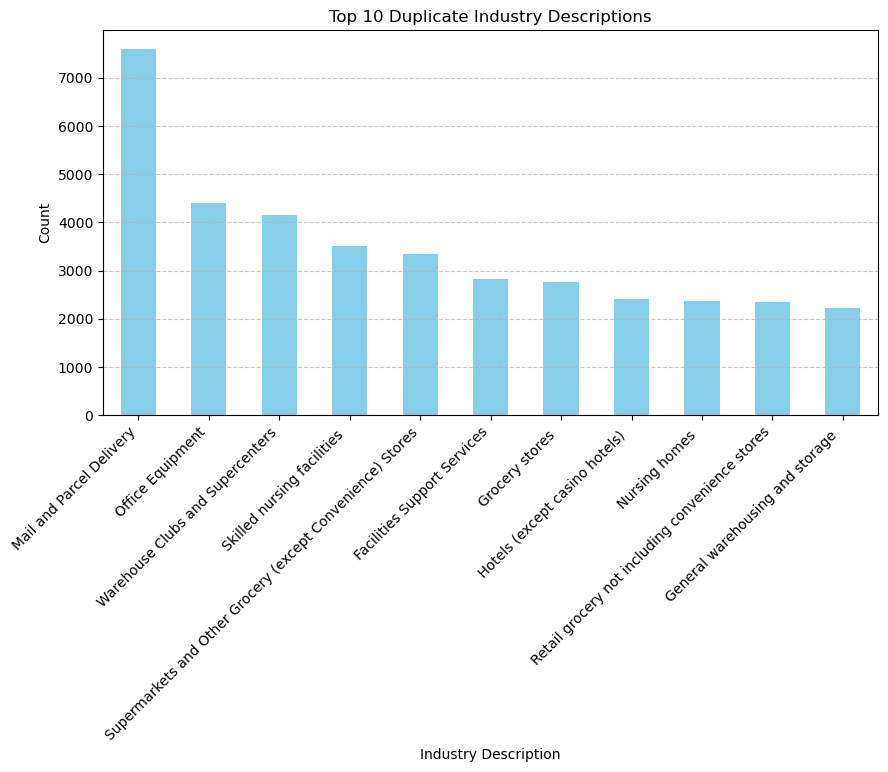

In [35]:
# Plot in a bar graph :

plt.figure(figsize=(10, 5))
duplicates.plot(kind='bar', color='skyblue')
plt.title('Top 10 Duplicate Industry Descriptions')
plt.xlabel('Industry Description')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

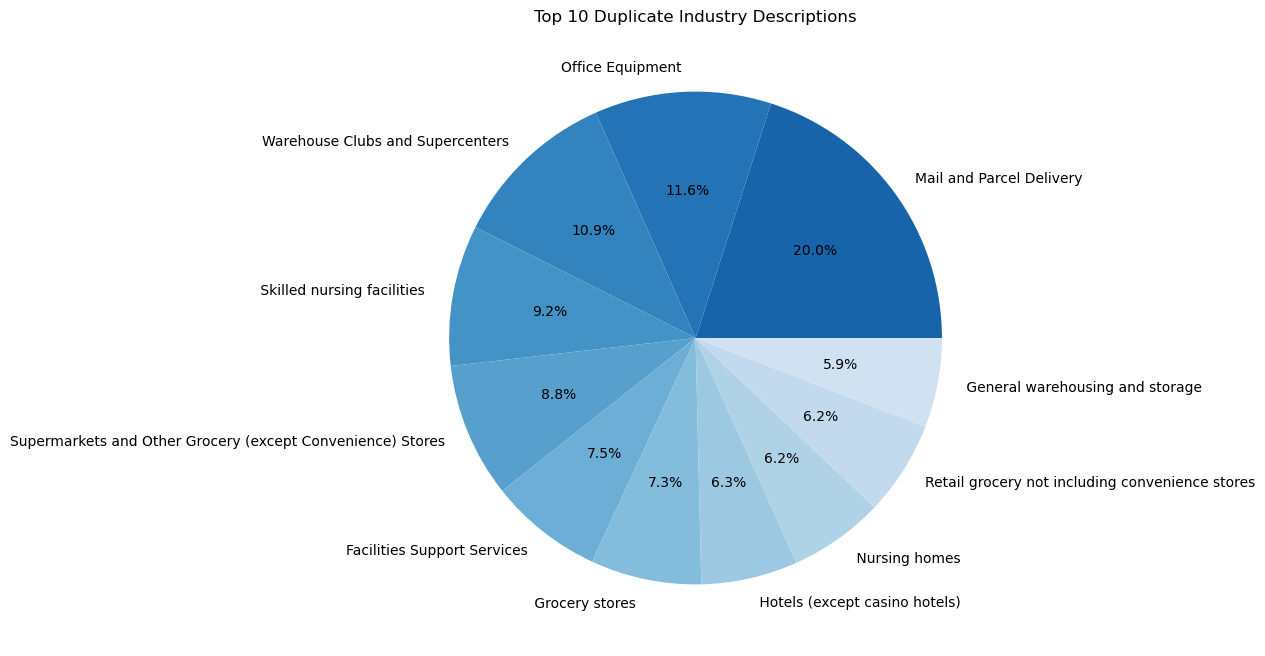

In [36]:
# Plot the percentage of these duplicates in a pie chart :

colors = plt.cm.Blues_r(np.linspace(0.2, 0.8, len(duplicates)))

plt.figure(figsize=(8, 8))
plt.pie(duplicates, labels=duplicates.index, autopct='%1.1f%%', colors=colors)
plt.title('Top 10 Duplicate Industry Descriptions')
plt.show()

### Exploring the column naics code 

This column contains industry sectors codes, this codes can have from 2 to 6 digits : 
* 2 digits : The sector : there are 20 sectors
* 3 digits : Subsectors : there are 96 subsectors
* 4 digits : Industry groups : there 308 industry groups
* 5 digits : Industry details : there are 689 industry details 
* 6 digits : Country specific detail (US, Canada or Mexico) : there are 1012 

In [37]:
# Calculating unique values :

print("Number of unique naics code :", dataset_2020['naics_code'].nunique())


Number of unique naics code : 1200


In [38]:
# Calculating duplicates : 

print("Number of duplicates naics code:", dataset_2020[dataset_2020.duplicated(['naics_code'], keep=False)]['naics_code'].nunique())

print('Number of duplicate values and their count :', dataset_2020['naics_code'].value_counts()[dataset_2020['naics_code'].value_counts() > 1])

Number of duplicates naics code: 1056
Number of duplicate values and their count : naics_code
445110    16223
491110     7657
623110     7390
721110     5309
493110     5272
          ...  
711510        2
482111        2
212391        2
336121        2
561622        2
Name: count, Length: 1056, dtype: int64


We will then use this column to know the industry instead of the column industry_description.

As a first try, we wil only use the sectors, so the 2 first digits of the codes. There are 20 sectors.

In [39]:
# Extracting the 2 first digits from the codes in the column naics_code and placing them in column called sectors_code :

dataset_2020['sectors_code'] = dataset_2020['naics_code'].astype(str).str[:2]

In [40]:
# Calculating the unique values :

print("Number of unique sectors code :", dataset_2020['sectors_code'].nunique())

Number of unique sectors code : 35


There should be 20 values because we only have 20 sectors. So we should check the values and clean them.

In [41]:
# Showing these 35 unique values :

print("Unique sectors codes:", dataset_2020['sectors_code'].unique())

Unique sectors codes: ['71' '33' '62' '23' '11' '48' '42' '49' '44' '53' '61' '32' '22' '81'
 '72' '31' '52' '45' '56' '92' '21' '54' '19' '55' '99' '51' '39' '16'
 '35' '43' '34' '29' '87' '79' '50']


There are some codes that represent the same sector, for example, the construction sector has a code from 31 to 33 so we sould group them to be considered as one sector

In [42]:
# Convert NAICS codes 31 or 32 to 33
dataset_2020['sectors_code'].replace(['31', '32'], '33', inplace=True)

# Convert NAICS code 44 to 45
dataset_2020['sectors_code'].replace('44', '45', inplace=True)

# Convert NAICS code 48 to 49
dataset_2020['sectors_code'].replace('48', '49', inplace=True)

In [43]:
# Recalculating the unique values :

print("Number of unique sectors code :", dataset_2020['sectors_code'].nunique())

Number of unique sectors code : 31


We still have 31 values and it should be 20, so let's dive more into the column.

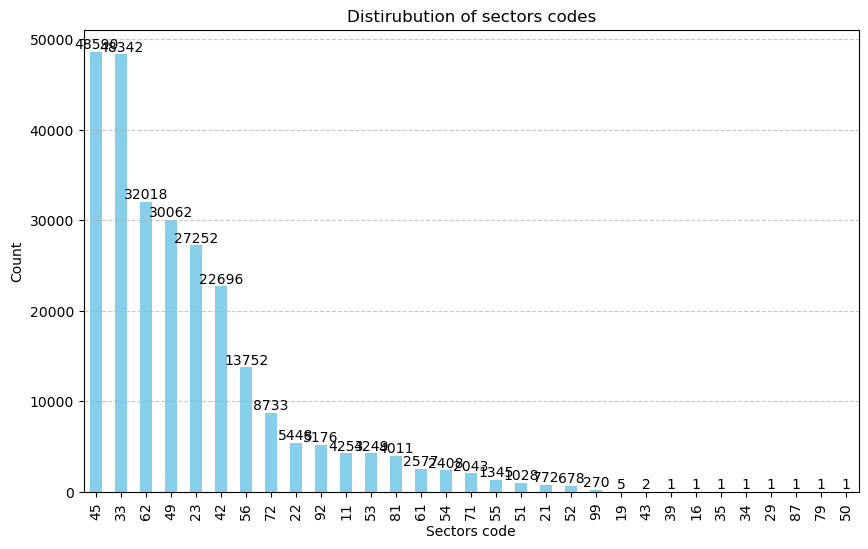

In [44]:
# Showing the distribution of every code :

plt.figure(figsize=(10, 6))
ax=dataset_2020['sectors_code'].value_counts().plot(kind='bar', color='skyblue')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Distirubution of sectors codes')
plt.xlabel('Sectors code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The 11 extra codes we have are the last ones who represent a count under 5 + the code 99 who represent 270 rows and this code is the nonclassifiable establishments so we are going to delete them all

In [45]:
# Defining the list of the real sectors codes :

sectors_code= ['11', '21', '22', '23', '31', '32', '33', '42', '44', '45', 
                 '48', '49', '51', '52', '53', '54', '55', '56', '61', '62', 
                 '71', '72', '81', '92']

# Cleaning the dataset by deleting the rows that don't have one of the values in the list :

dataset_2020 = dataset_2020[dataset_2020['sectors_code'].isin(sectors_code)]

In [46]:
# Recalculating the unique values :

print("Number of unique sectors code :", dataset_2020['sectors_code'].nunique())

Number of unique sectors code : 20


Let's now create another column with the subsectors codes (3 digits code). There are 96 subsectors.

In [47]:
# Extracting the 3 first digits from the codes in the column naics_code and placing them in column called subsectors_code :

dataset_2020['subsectors_code'] = dataset_2020['naics_code'].astype(str).str[:3]

In [48]:
# Calculating the unique values :

print("Number of unique subsectors code :", dataset_2020['subsectors_code'].nunique())

Number of unique subsectors code : 105


There should be maximum 96 values because we only have 96 subsectors. So we should check the values and clean them.

In [49]:
# Showing these unique values :

print("Unique subsectors codes:", dataset_2020['subsectors_code'].unique())

Unique subsectors codes: ['713' '336' '621' '236' '238' '112' '485' '424' '493' '333' '444' '441'
 '532' '445' '332' '611' '326' '423' '221' '812' '721' '484' '311' '237'
 '722' '327' '524' '452' '453' '561' '312' '111' '486' '623' '813' '323'
 '321' '325' '331' '622' '334' '712' '924' '922' '624' '213' '492' '811'
 '541' '522' '442' '447' '551' '443' '531' '446' '921' '448' '491' '339'
 '481' '314' '488' '315' '517' '562' '511' '337' '525' '454' '324' '335'
 '115' '519' '926' '322' '425' '518' '927' '925' '711' '512' '451' '211'
 '923' '533' '313' '316' '113' '212' '483' '928' '515' '114' '422' '523'
 '487' '222' '521' '814' '818' '555' '440' '228' '482']


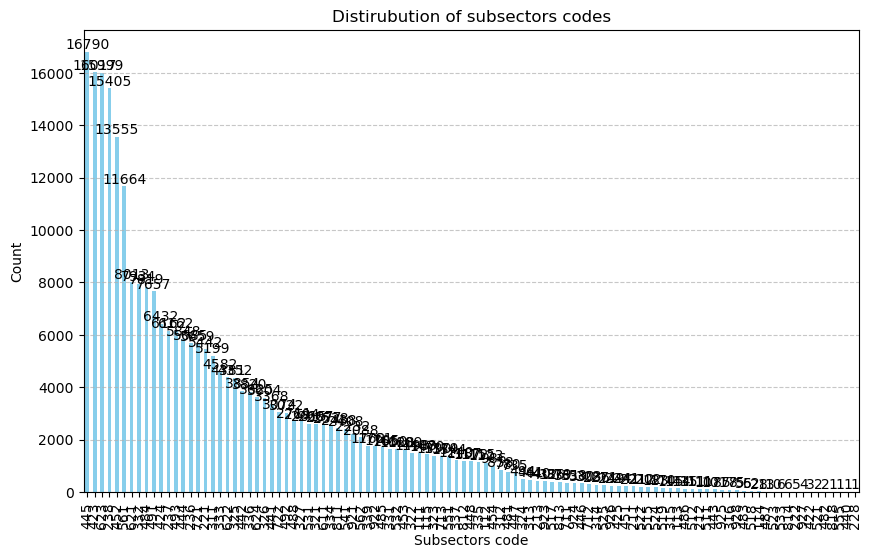

In [50]:
# Showing the distribution of every code :

plt.figure(figsize=(10, 6))
ax=dataset_2020['subsectors_code'].value_counts().plot(kind='bar', color='skyblue')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Distirubution of subsectors codes')
plt.xlabel('Subsectors code')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The 9 extra codes we have are the last ones who represent a count under 5 so we are goig to delete them all

In [51]:
# Defining the list of the real subsectors codes :

subsectors_code= [
    '111', '112', '113', '114', '115', '211', '212', '213', '221', '236', '237', '238', 
    '311', '312', '313', '314', '315', '316', '321', '322', '323', '324', '325', '326', 
    '327', '331', '332', '333', '334', '335', '336', '337', '339', '423', '424', '425', 
    '441', '444', '445', '449', '455', '456', '457', '458', '459', '481', '482', '483', 
    '484', '485', '486', '487', '488', '491', '492', '493', '512', '513', '516', '517', 
    '518', '519', '521', '522', '523', '524', '525', '531', '532', '533', '541', '551', 
    '561', '562', '611', '621', '622', '623', '624', '711', '712', '713', '721', '722', 
    '811', '812', '813', '814', '921', '922', '923', '924', '925', '926', '927', '928'
]

# Cleaning the dataset by deleting the rows that don't have one of the values in the list :

dataset_2020 = dataset_2020[dataset_2020['subsectors_code'].isin(subsectors_code)]

In [52]:
# Recalculating the unique values :

print("Number of unique subsectors code :", dataset_2020['subsectors_code'].nunique())

Number of unique subsectors code : 88


### Correlations 

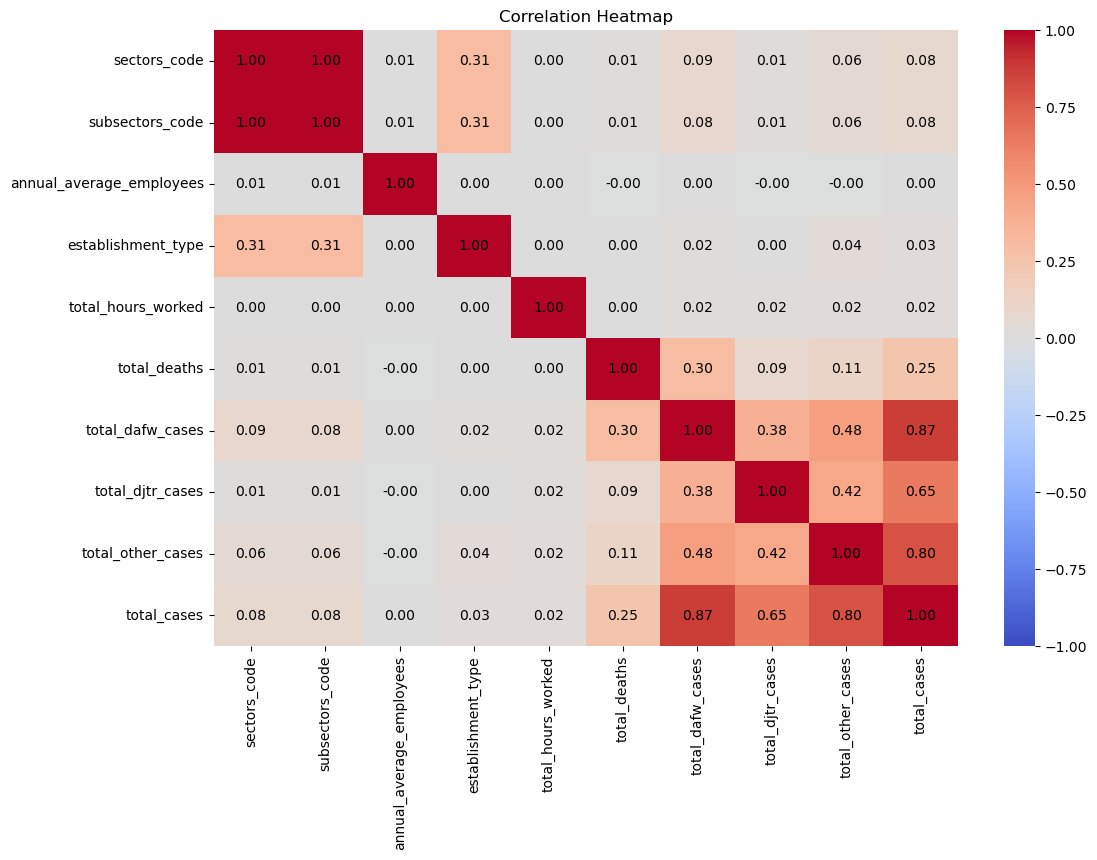

In [53]:
# Select the columns for correlation analysis
columns = ['sectors_code','subsectors_code', 'annual_average_employees', 'establishment_type', 
           'total_hours_worked', 'total_deaths', 'total_dafw_cases', 'total_djtr_cases', 'total_other_cases', 'total_cases']

# Compute the correlation matrix
correlation_matrix = dataset_2020[columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, center=0, vmin=-1, vmax=1)

# Add annotations manually
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j+0.5, i+0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]), ha='center', va='center', color='black')

plt.title('Correlation Heatmap')
plt.xticks(ticks=np.arange(len(correlation_matrix.columns)) + 0.5, labels=correlation_matrix.columns)
plt.yticks(ticks=np.arange(len(correlation_matrix.index)) + 0.5, labels=correlation_matrix.index)
plt.show()

In [54]:
import plotly.graph_objects as go

# Group dataset by 'sectors_code' and sum the accidents for each sector
accidents_by_sector = dataset_2020.groupby('sectors_code')[accident_columns].sum()

# Plot grouped bar chart for accidents by sector
fig = go.Figure()

for col in accident_columns:
    fig.add_trace(go.Bar(x=accidents_by_sector.index, y=accidents_by_sector[col], name=col))

fig.update_layout(title='Distribution of accidents by sector in 2020',
                  xaxis_title='Sectors code',
                  yaxis_title='Count',
                  barmode='group')

fig.show()

In [55]:
# Group dataset by 'subsectors_code' and sum the accidents for each subsector
accidents_by_sector = dataset_2020.groupby('subsectors_code')[accident_columns].sum()

# Plot grouped bar chart for accidents by sector
fig = go.Figure()

for col in accident_columns:
    fig.add_trace(go.Bar(x=accidents_by_sector.index, y=accidents_by_sector[col], name=col))

fig.update_layout(title='Distribution of accidents by subsector in 2020',
                  xaxis_title='Subsectors code',
                  yaxis_title='Count',
                  barmode='group')

fig.show()

In [56]:
dataset_2020.columns

Index(['establishment_name', 'city', 'state', 'establishment_type',
       'created_timestamp', 'naics_code', 'industry_description',
       'annual_average_employees', 'total_hours_worked', 'total_deaths',
       'total_dafw_cases', 'total_djtr_cases', 'total_other_cases',
       'total_injuries', 'lat', 'lon', 'total_cases', 'is_correct',
       'sectors_code', 'subsectors_code'],
      dtype='object')

In [57]:
dataset_2020.shape

(242529, 20)

## Taking a sample of our dataset 

In [58]:

dataset_2020=dataset_2020.sample(n=10000, random_state=42)

# PREPROCESSING 

### Preprocessing with sklearn

In [59]:
# Separating target from features :

features='subsectors_code','total_deaths', 'total_djtr_cases', 'total_other_cases' 

target = 'total_dafw_cases'

print("Separating labels from features...")
X=dataset_2020.loc[:,features]
Y=dataset_2020.loc[:,target]


print("Done...")
display(X.head())
display(Y.head())


Separating labels from features...
Done...


,subsectors_code,total_deaths,total_djtr_cases,total_other_cases
175652,484,0,0,1
111906,561,0,0,0
38257,445,0,0,0
224239,325,0,0,0
50929,811,0,0,0


175652    5
111906    0
38257     1
224239    0
50929     2
Name: total_dafw_cases, dtype: int64

In [60]:
# Dividing into train and test sets :

print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")

Dividing into train and test sets...
...Done.


In [61]:
# Encoding categorical features and standardizing numeric features :

numeric_features =['total_deaths', 'total_djtr_cases', 'total_other_cases']
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
    ]
)

categorical_features= ['subsectors_code']
categorical_transformer= Pipeline(
    steps = [
        ("encoder", OneHotEncoder(drop="first", handle_unknown='ignore'))
    ]
)

preprocessor= ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [62]:
# Applying the preprocessing on the train and test sets :

print("Performing preprocessing on train set...")
print(X_train.head())
X_train_preprocessed= preprocessor.fit_transform(X_train)
print("Done...")
print(X_train_preprocessed[0:5,:])

print("Performing preprocessing on test set...")
print(X_test.head())
X_test_preprocessed=preprocessor.transform(X_test)
print("Done...")
print(X_test_preprocessed[0:5,:])

Performing preprocessing on train set...
       subsectors_code  total_deaths  total_djtr_cases  total_other_cases
92551              332             0                 0                  6
73848              238             0                 0                  0
258574             423             0                 0                  0
147957             493             0                 0                  1
250761             238             0                 1                  0
Done...
  (0, 0)	-0.057101636929734155
  (0, 1)	-0.2389429099120746
  (0, 2)	0.7748217444817288
  (0, 28)	1.0
  (1, 0)	-0.057101636929734155
  (1, 1)	-0.2389429099120746
  (1, 2)	-0.23674991779110435
  (1, 13)	1.0
  (2, 0)	-0.057101636929734155
  (2, 1)	-0.2389429099120746
  (2, 2)	-0.23674991779110435
  (2, 35)	1.0
  (3, 0)	-0.057101636929734155
  (3, 1)	-0.2389429099120746
  (3, 2)	-0.06815464074563214
  (3, 49)	1.0
  (4, 0)	-0.057101636929734155
  (4, 1)	-0.024716385279485022
  (4, 2)	-0.23674991779110435
 

c:\Users\yousr\Anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning:

Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros



# MODEL TRAINING

# First model : Linear regression 

In [63]:
# Train model

model_1 = LinearRegression()

print("Training model...")
model_1.fit(X_train_preprocessed, Y_train)
print("...Done.")

Training model...
...Done.


### Predictions

In [64]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model_1.predict(X_train_preprocessed)
print("...Done.")
print(Y_train_pred[0:5])


Predictions on training set...
...Done.
[ 3.59245698 -0.01975627  0.04350956  1.04277078  0.40145526]


In [65]:
# Predictions on testing set
print("Predictions on testing set...")
Y_test_pred = model_1.predict(X_test_preprocessed)
print("...Done.")
print(Y_test_pred[0:5])

Predictions on testing set...
...Done.
[-0.19414799 -0.41260755  5.81893924  0.22310507  1.44828834]


### Performances evaluation

In [66]:
# Print scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.38010266538160165
R2 score on test set :  0.44808265050097307


# Second model : Decision Tree Regressor

In [67]:
# Train model

model_2 = DecisionTreeRegressor()

print("Training model...")
model_2.fit(X_train_preprocessed, Y_train)
print("...Done.")

Training model...


...Done.


### Predictions

In [68]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model_2.predict(X_train_preprocessed)
print("...Done.")
print(Y_train_pred[0:5])


Predictions on training set...
...Done.
[3.5        0.43617021 0.24157303 1.88888889 1.03030303]


In [69]:
# Predictions on testing set
print("Predictions on testing set...")
Y_test_pred = model_2.predict(X_test_preprocessed)
print("...Done.")
print(Y_test_pred[0:5])

Predictions on testing set...
...Done.
[0.84210526 0.28571429 4.68159204 0.16666667 2.66666667]


### Performances evaluation

In [70]:
# Print scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.8399084891057936
R2 score on test set :  0.3139594302823764


# Third model : Random Forest regressor

In [71]:
# Train model

model_3 = RandomForestRegressor()

print("Training model...")
model_3.fit(X_train_preprocessed, Y_train)
print("...Done.")

Training model...


...Done.


### Predictions

In [72]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model_3.predict(X_train_preprocessed)
print("...Done.")
print(Y_train_pred[0:5])


Predictions on training set...
...Done.
[3.17869048 0.44341742 0.23293097 1.98975563 1.05983285]


In [73]:
# Predictions on testing set
print("Predictions on testing set...")
Y_test_pred = model_3.predict(X_test_preprocessed)
print("...Done.")
print(Y_test_pred[0:5])

Predictions on testing set...
...Done.
[0.84880681 0.27948945 4.72423812 0.19694877 2.41471356]


### Performances evaluation

In [74]:
# Print scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7507958349776938
R2 score on test set :  0.3374832483721598


### DecisionTreeRegressor and RandomForestRegressor perfom better. So let's dive more into these 2 models and performs some gridSearch

In [75]:
# Perform grid search
print("Grid search...")
model_2 = DecisionTreeRegressor()

# Grid of values to be tested

params = {
    "max_depth": [4, 6, 8, 10,20, 30, 40],
    "min_samples_leaf": [1, 2, 5, 6, 8, 10],
    "min_samples_split": [2, 4, 8, 10, 12, 15],
}
gridsearch = GridSearchCV(
    model_2, param_grid=params, cv=3
) 


gridsearch.fit(X_train_preprocessed, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 15}
Best validation score :  0.18917629062354313


In [76]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train_preprocessed)
print("...Done.")
print(Y_train_pred)
print()


Predictions on training set...
...Done.
[3.09966777 0.82962612 0.82962612 ... 3.09966777 7.82926829 0.82962612]



In [77]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test_preprocessed)
print("...Done.")
print(Y_test_pred)
print()


Predictions on test set...
...Done.
[0.82962612 0.82962612 5.4754522  ... 0.82962612 0.82962612 4.25352113]



In [78]:
# Print scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))
print()


R2 score on training set :  0.45282365328441077
R2 score on test set :  0.34504260587630264



In [79]:
# Perform grid search
print("Grid search...")
model_3 = RandomForestRegressor()

# Grid of values to be tested

params = {
    "max_depth": [2, 4, 6, 8, 10, 20, 30, 40],
    "min_samples_leaf": [1, 2, 5, 6, 8, 10],
    "min_samples_split": [2, 4, 8,10, 12, 15],
    "n_estimators": [10, 20, 40, 60, 80, 100],
}
gridsearch = GridSearchCV(
    model_3, param_grid=params, cv=3
)  


gridsearch.fit(X_train_preprocessed, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 10}
Best validation score :  0.24986646718344185


In [80]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train_preprocessed)
print("...Done.")
print(Y_train_pred)
print()


Predictions on training set...
...Done.
[ 2.62159552  0.42471533  0.42471533 ...  5.33388223 15.79006692
  1.15072116]



In [81]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test_preprocessed)
print("...Done.")
print(Y_test_pred)
print()



Predictions on test set...
...Done.
[0.42471533 0.42471533 4.80969676 ... 0.42471533 0.42471533 7.1123079 ]



In [82]:
# Print scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))
print()

R2 score on training set :  0.36124699014136785
R2 score on test set :  0.36462394841667056



#  STACKING

In [83]:
# Train the model
from sklearn.ensemble import StackingRegressor
print("Training stacking regressor...")

stacking = StackingRegressor(
    estimators=[("random_forest", model_3), ("tree", model_2), ("linear", model_1)], cv=3
)

preds = stacking.fit_transform(X_train_preprocessed, Y_train)
predictions = pd.DataFrame(preds, columns=stacking.named_estimators_.keys())
print("...Done.")
display(predictions)
print("R2 score on training set : ", stacking.score(X_train_preprocessed, Y_train))
print("R2 score on test set : ", stacking.score(X_test_preprocessed, Y_test))

Training stacking regressor...
...Done.


,random_forest,tree,linear
0,3.099583,3.500000,3.592457
1,0.448447,0.436170,-0.019756
2,0.248970,0.241573,0.043510
3,1.950909,1.888889,1.042771
4,1.024141,1.030303,0.401455
...,...,...,...
7995,8.107286,8.333333,8.009149
7996,0.155918,0.155556,0.554095
7997,6.010333,4.000000,11.576829
7998,15.160000,9.000000,19.042920


R2 score on training set :  0.41077357996555264
R2 score on test set :  0.4472327083388601
